In [1]:
import turicreate as tc

In [32]:
image_data = tc.SFrame('/Users/shreyasshah/Desktop/image_train_data/')

In [33]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [34]:
knn_model = tc.nearest_neighbors.create(image_data, features=['deep_features'], label='id')


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

## use image retrieval model with deep features to find similar images

,SArray
0,

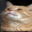

In [35]:
cat = image_data[18:19]
cat['image'].explore()

In [36]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 2.865ms      |

| Done         |         | 100         | 51.039ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [37]:
def get_img_from_id(x):
  return image_data.filter_by(x['reference_label'], 'id')

In [38]:
cat_neighbours = get_img_from_id(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.719ms      |

| Done         |         | 100         | 52.625ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

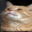
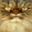
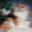
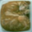
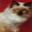

In [39]:
cat_neighbours['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.22ms       |

| Done         |         | 100         | 63.707ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

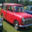
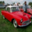
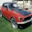
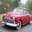
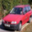

In [40]:
# for a car

car = image_data[8:9]
get_img_from_id(knn_model.query(car))['image'].explore()

# just for fun

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 3.182ms      |

| Done         |         | 100         | 51.332ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

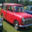
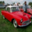
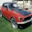
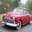
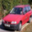

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 3.109ms      |

| Done         |         | 100         | 59.336ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

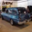
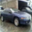
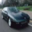
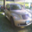
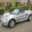

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 3.495ms      |

| Done         |         | 100         | 53.571ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

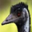
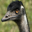
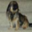
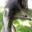
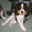

In [41]:
show_neighbors = lambda i: get_img_from_id(knn_model.query(image_data[i:i+1]))['image'].explore()

show_neighbors(8)
show_neighbors(26)
show_neighbors(500)

# assignment

In [42]:
print(tc.Sketch(image_data['label']))


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+




In [43]:
cat_data = image_data[image_data['label']=='cat']
dog_data = image_data[image_data['label']=='dog']
auto_data = image_data[image_data['label']=='automobile']
bird_data = image_data[image_data['label']=='bird']

cat_model = tc.nearest_neighbors.create(cat_data, features=['deep_features'], label='id')
dog_model = tc.nearest_neighbors.create(dog_data, features=['deep_features'], label='id')
auto_model = tc.nearest_neighbors.create(auto_data, features=['deep_features'], label='id')
bird_model = tc.nearest_neighbors.create(bird_data, features=['deep_features'], label='id')


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [44]:
test_data = tc.SFrame('/Users/shreyasshah/Desktop/image_test_data/')

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.919ms      |

| Done         |         | 100         | 31.503ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.37ms       |

| Done         |         | 100         | 27.59ms      |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

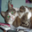
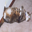
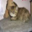
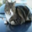
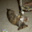

In [59]:
cat_model.query(test_data[0:1])
get_img_from_id(cat_model.query(test_data[0:1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.843ms      |

| Done         |         | 100         | 27.921ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.747ms      |

| Done         |         | 100         | 26.651ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

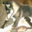
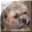
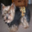
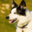
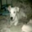

In [60]:
dog_model.query(test_data[0:1])
get_img_from_id(dog_model.query(test_data[0:1]))['image'].explore()

In [47]:
cat_model.query(test_data[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.482ms      |

| Done         |         | 100         | 22.224ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [48]:
dog_model.query(test_data[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.234ms      |

| Done         |         | 100         | 35.636ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

In [49]:
cat_test_data = test_data[test_data['label']=='cat']
dog_test_data = test_data[test_data['label']=='dog']
auto_test_data = test_data[test_data['label']=='automobile']
bird_test_data = test_data[test_data['label']=='bird']



In [51]:
dog_cat_neighbors = cat_model.query(dog_test_data, k=1)
dog_cat_neighbors

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 175.164ms    |

| Done         | 509000  | 100         | 318.744ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,33,36.419607706754384,1
1,30606,38.83532688735546,1
2,5545,36.97634108541545,1
3,19631,34.575007291446106,1
4,7493,34.778824791016625,1
5,47044,35.11715782924591,1
6,13918,40.60958309132646,1
7,10981,39.90368673062212,1
8,45456,38.06747001682115,1
9,44673,42.725873295060296,1


In [52]:
dog_auto_neighbors = auto_model.query(dog_test_data, k=1)
dog_auto_neighbors

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 163.963ms    |

| Done         | 509000  | 100         | 224.742ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,33859,41.95797614571203,1
1,2046,46.002133180677895,1
2,19594,42.946229069238804,1
3,11000,41.6866060048479,1
4,19594,39.22696649347584,1
5,49314,40.58451176980721,1
6,40822,45.10673529610857,1
7,44997,41.322114097397666,1
8,33859,41.82446549950164,1
9,33859,45.49769294011039,1


In [53]:
dog_bird_neighbors = bird_model.query(dog_test_data, k=1)
dog_bird_neighbors

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 175.946ms    |

| Done         | 478000  | 100         | 201.422ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,44658,41.75386473035126,1
1,9215,41.338295892486116,1
2,36675,38.61575908528905,1
3,12582,37.08922699538219,1
4,36122,38.27228869398105,1
5,8736,39.146208923590464,1
6,38991,40.523040105962316,1
7,44177,38.194791839269584,1
8,4549,40.15671316613142,1
9,40225,45.55979626027668,1


In [54]:
dog_dog_neighbors = dog_model.query(dog_test_data, k=1)
dog_dog_neighbors

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 154.579ms    |

| Done         | 509000  | 100         | 191.398ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,49803,33.47735903726336,1
1,5755,32.84584956840558,1
2,20715,35.039707318905855,1
3,13387,33.90103276968192,1
4,12089,37.48492509092561,1
5,6094,34.94516534398125,1
6,3431,39.09572783446351,1
7,6184,37.76961310322033,1
8,2167,35.10891446032839,1
9,7776,43.242283258453455,1


In [55]:
dog_distances = tc.SFrame({
  'dog-dog': dog_dog_neighbors['distance'], 
  'dog-cat': dog_cat_neighbors['distance'],
  'dog-bird': dog_bird_neighbors['distance'], 
  'dog-auto': dog_auto_neighbors['distance']
  })


In [56]:
dog_distances

dog-auto,dog-bird,dog-cat,dog-dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726336
46.002133180677895,41.338295892486116,38.83532688735546,32.84584956840558
42.946229069238804,38.61575908528905,36.97634108541545,35.039707318905855
41.6866060048479,37.08922699538219,34.575007291446106,33.90103276968192
39.22696649347584,38.27228869398105,34.778824791016625,37.48492509092561
40.58451176980721,39.146208923590464,35.11715782924591,34.94516534398125
45.10673529610857,40.523040105962316,40.60958309132646,39.09572783446351
41.322114097397666,38.194791839269584,39.90368673062212,37.76961310322033
41.82446549950164,40.15671316613142,38.06747001682115,35.10891446032839
45.49769294011039,45.55979626027668,42.725873295060296,43.242283258453455


In [61]:
def is_dog_correct(row):
    return (
        row['dog-dog'] < row['dog-auto'] and
        row['dog-dog'] < row['dog-bird'] and
        row['dog-dog'] < row['dog-cat']
    )


dog_distances['is_dog_correct'] = dog_distances.apply(is_dog_correct)


print(dog_distances['is_dog_correct'].sum() / len(dog_distances))


0.678
